# Part 3 (visualization practice for stream lit app)

- My main obstacle for now is understanding how all these different parts (notebooks, .csv's, plots, streamlit library) work together in reality since it's my first time fully executing an app idea.

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---
### Test Graph for streamlit app

- One simple idea to get the ball rolling would be a simple time series graph of a single restaurants inspection history plotting the number of violations they had at each time along with type of inspection (color coded)

In [105]:
# load dataset
chicago = pd.read_csv('../data/processed_chicago.csv')
chicago.head(3)

,inspection_id,dba_name,aka_name,license_#,facility_type,risk,address,inspection_date,inspection_type,results,violations,violation_count,violation_codes,is_reinspection
0,2606078,LOOMIS CITGO INC.,LOOMIS CITGO INC.,2523672.0,GAS STATION,Risk 2 (Medium),1356 W 87TH ST,11/07/2024,Canvass Re-Inspection,Pass,49. NON-FOOD/FOOD CONTACT SURFACES CLEAN - Com...,5,"[49, 55, 55, 55, 57]",True
1,2606026,FAMOUS GRILL,SAM'S FAMOUS GRILL,2961604.0,Restaurant,Risk 1 (High),2926 W 63RD ST,11/06/2024,License,Pass,No Violations,0,[],False
2,2605986,MOODZ FOOD & DELI,MOODZ FOOD & DELI,2992998.0,Grocery Store,Risk 1 (High),233 W 119TH ST,11/06/2024,License Re-Inspection,Pass,"38. INSECTS, RODENTS, & ANIMALS NOT PRESENT - ...",10,"[38, 47, 49, 51, 54, 55, 55, 56, 56, 57]",True


In [170]:
# lets check out a single mcdonalds location by license #
single_mcd = chicago[chicago['license_#'] == 2549249.0].copy()
# converting inspection_date to datetime index for easy plotting
single_mcd['inspection_date'] = pd.to_datetime(single_mcd['inspection_date'])
single_mcd.set_index('inspection_date', inplace = True)
single_mcd = single_mcd.sort_index()

single_mcd

,inspection_id,dba_name,aka_name,license_#,facility_type,risk,address,inspection_type,results,violations,violation_count,violation_codes,is_reinspection
inspection_date,,,,,,,,,,,,,
2018-07-03,2184228,McDONALD'S,McDONALD'S,2549249.0,Restaurant,Risk 2 (Medium),186 W ADAMS ST,Complaint Re-Inspection,Pass,No Violations,0,[],True
2019-07-02,2300661,McDONALD'S,McDONALD'S,2549249.0,Restaurant,Risk 2 (Medium),186 W ADAMS ST,Complaint,Pass,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,3,"[10, 36, 56]",False
2020-04-24,2369691,McDONALD'S,McDONALD'S,2549249.0,Restaurant,Risk 2 (Medium),186 W ADAMS ST,Canvass,Fail,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,3,"[10, 10, 16]",False
2020-04-28,2369797,McDONALD'S,McDONALD'S,2549249.0,Restaurant,Risk 2 (Medium),186 W ADAMS ST,Canvass Re-Inspection,Pass,No Violations,0,[],True
2021-01-27,2473205,McDONALD'S,McDONALD'S,2549249.0,Restaurant,Risk 2 (Medium),186 W ADAMS ST,Canvass,Pass,56. ADEQUATE VENTILATION & LIGHTING; DESIGNATE...,1,[56],False
2022-06-06,2556849,McDONALD'S,McDONALD'S,2549249.0,Restaurant,Risk 2 (Medium),186 W ADAMS ST,Canvass,Pass,No Violations,0,[],False
2022-12-22,2568909,McDONALD'S,McDONALD'S,2549249.0,Restaurant,Risk 2 (Medium),186 W ADAMS ST,Complaint,Fail,"38. INSECTS, RODENTS, & ANIMALS NOT PRESENT - ...",3,"[38, 47, 55]",False
2022-12-29,2569082,McDONALD'S,McDONALD'S,2549249.0,Restaurant,Risk 2 (Medium),186 W ADAMS ST,Complaint Re-Inspection,Pass,"55. PHYSICAL FACILITIES INSTALLED, MAINTAINED ...",1,[55],True


In [176]:
def plot_history(data, name, address):
    '''
        This is a test function to display the violation count history of a single location
    '''
    plt.figure(figsize = (14, 4))
    
    sns.scatterplot(data = data,
                   x = data.index,
                   y = 'violation_count',
                   hue = 'inspection_type',
                   palette = 'tab10',
                   s = 200)
    
    plt.title(f'Violation Count of {name} at {address}', size = 25)
    plt.xlabel('Date of Inspection', size = 25)
    plt.ylabel('Number of Violations', size = 20)
    plt.xticks(rotation = 30)
    plt.grid(True)
    
    plt.legend(title = 'Type of Inspection', bbox_to_anchor = (1, 1))
    plt.show();

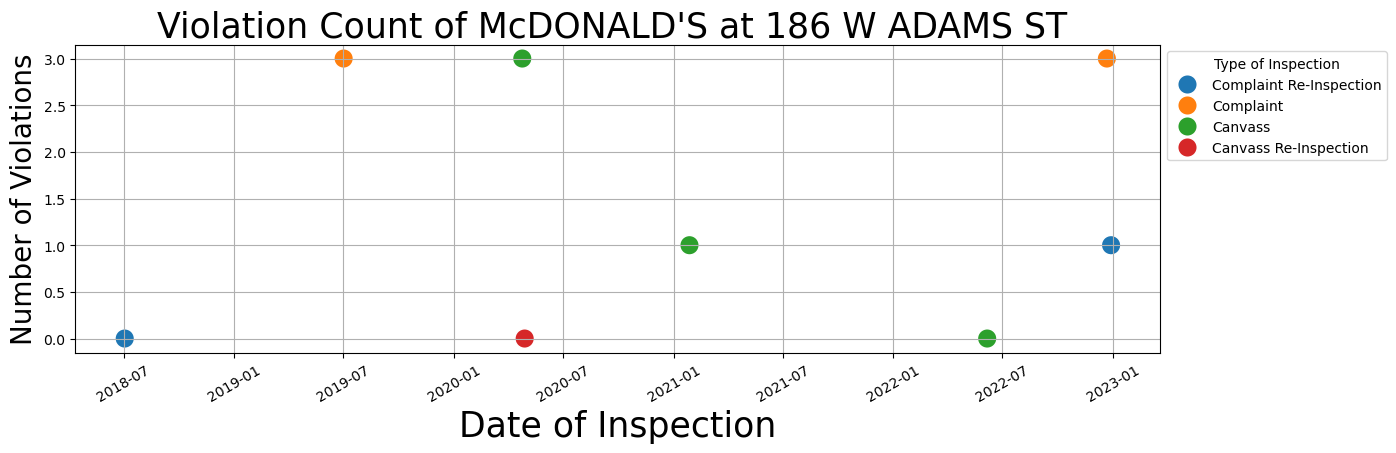

In [180]:
plot_history(single_mcd,
            name = single_mcd['aka_name'].iloc[0],
            address = single_mcd['address'].iloc[0])